In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## Step 1: Run k independent simulations

In this example, each run tracks the value of interest over 30 time periods.

In [2]:
# Here we assume we have done so and are reading in the output of these simulations
#results = pd.read_csv('Airportsim.csv')
results = pd.read_csv('intque40.csv')

In [3]:
# Each row corresponds to 3 columns
# Time: the timestamp within each simulation run
# Run: the simulation run
# Value: the value of interest, queue length of gate waiting 1 and 2
print(results.head())
print(results.tail())
print(results.columns)

   Time  Value1  Value2  Run
0     1       2       2    1
1     2       8       8    1
2     3       6       6    1
3     4       4       4    1
4     5       2       2    1
     Time  Value1  Value2  Run
495   496       4       3    1
496   497       2       9    1
497   498       8       7    1
498   499       6       9    1
499   500       4       9    1
Index(['Time', 'Value1', 'Value2', 'Run'], dtype='object')


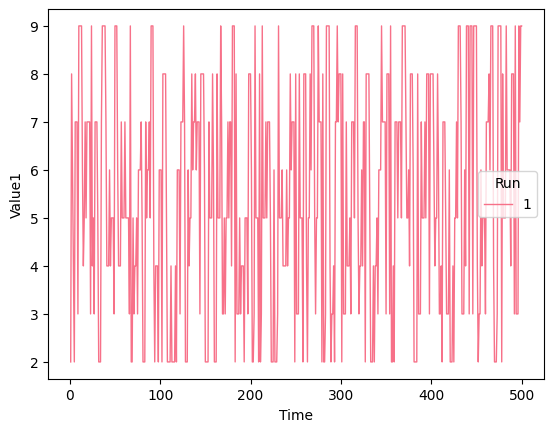

In [4]:
# Example plot of k runs (change the value of k to see different number of runs)
# Each run tracks the value of interest over n time periods
k=1
ax1 = sns.lineplot(x='Time', y='Value2', hue='Run', data=results[results['Run'] <= k],  palette=sns.color_palette('husl', k), linestyle='-', linewidth=1)

# Create a secondary y-axis for 'Value2' column
#ax2 = ax1.twinx()

# Set labels and legends
ax1.set_ylabel('Value1')

plt.show()

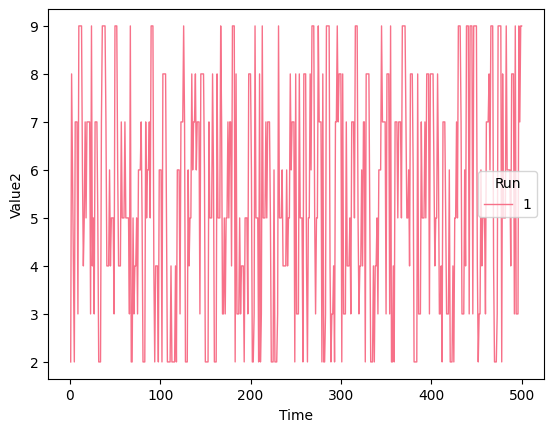

In [5]:
ax2 = sns.lineplot(x='Time', y='Value2', hue='Run', data=results[results['Run'] <= k],  palette=sns.color_palette('husl', k), linestyle='-', linewidth=1)

# Set labels and legends
ax2.set_ylabel('Value2')
plt.show()

## Step 2: Average matching observations
Average across runs for each time period.

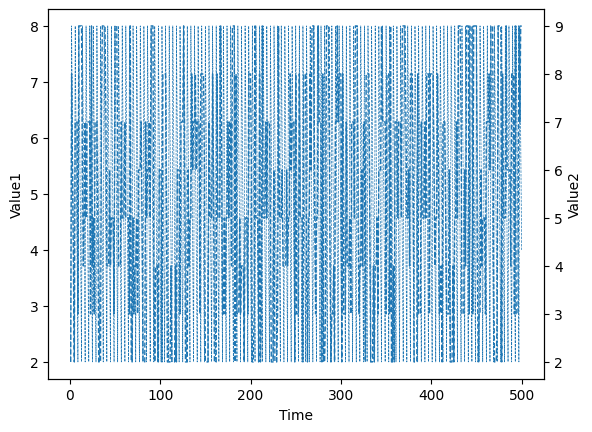

In [6]:
# Average the value at each time period, over all k runs.
ave_results = results.groupby('Time',as_index=False)['Value1'].mean()
ave_results2 = results.groupby('Time',as_index=False)['Value2'].mean()

ax1 = sns.lineplot(x='Time',y='Value1',data=ave_results,linestyle='--',linewidth=0.5)


# Create a secondary y-axis for 'Value2' column
ax2 = ax1.twinx()
sns.lineplot(x='Time',y='Value2',data=ave_results2,linestyle='--',linewidth=1)

# Set labels and legends
ax1.set_ylabel('Value1')
ax2.set_ylabel('Value2')
plt.show()

## Step 3: Compute moving averages
Compute the moving average over the last t time periods to be able to observe general trends.

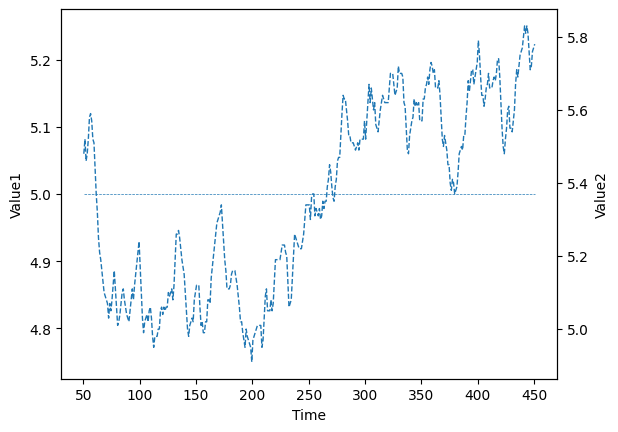

In [7]:
moving_ave = ave_results.rolling(100).mean()

moving_ave2 = ave_results2.rolling(100).mean()

ax1 = sns.lineplot(x='Time',y='Value1',data=moving_ave,linestyle='--',linewidth=0.5)

# Create a secondary y-axis for 'Value2' column
ax2 = ax1.twinx()
sns.lineplot(x='Time',y='Value2',data=moving_ave2,linestyle='--',linewidth=1)

# Set labels and legends
ax1.set_ylabel('Value1')
ax2.set_ylabel('Value2')
plt.show()

## Step 4: Plot moving averages for different window sizes
Different window sizes show trends at different timescales.

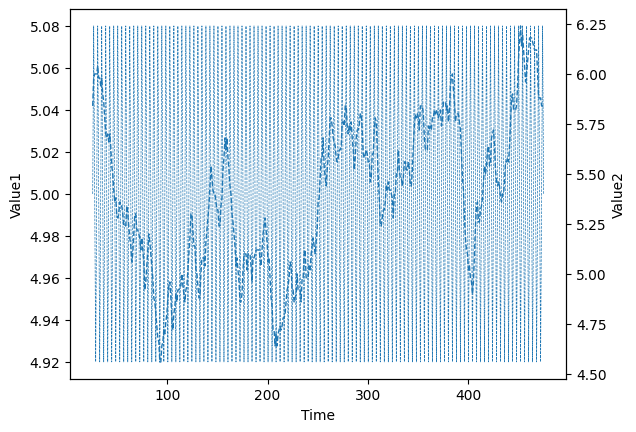

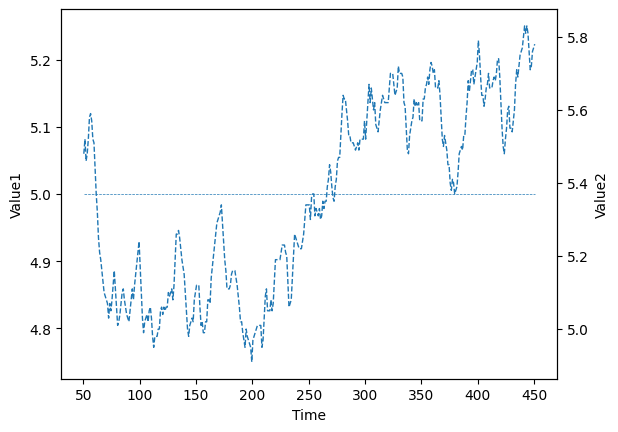

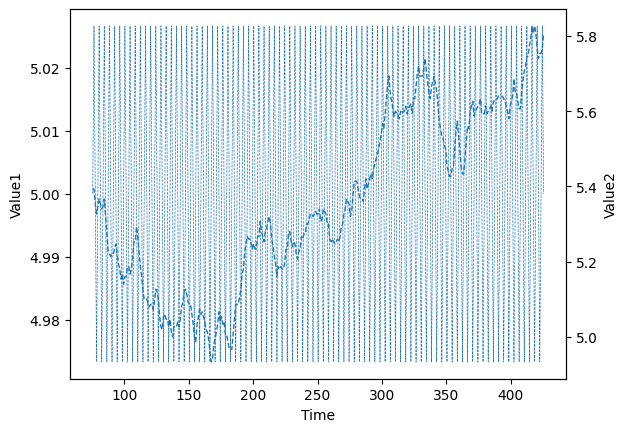

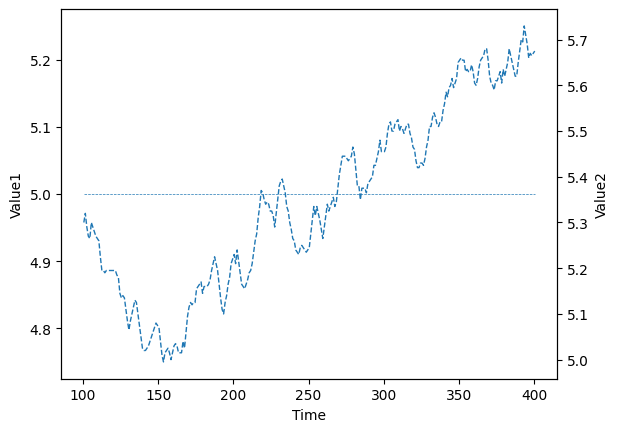

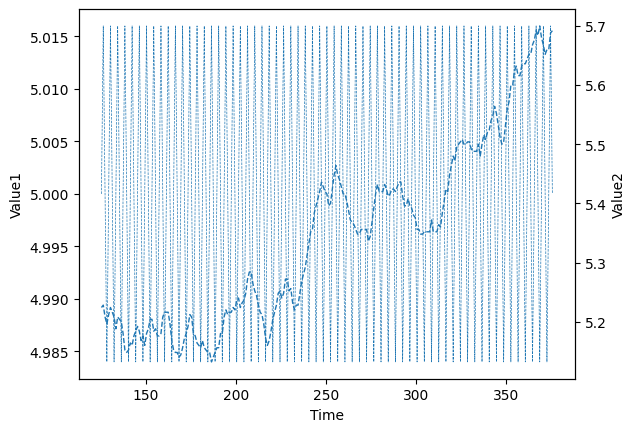

In [8]:
for mavg in [50,100,150,200,250]:
    moving_ave = ave_results.rolling(mavg).mean()
    
    moving_ave2 = ave_results2.rolling(mavg).mean()
    
    ax1 = sns.lineplot(x='Time',y='Value1',data=moving_ave,linestyle='--',linewidth=0.5)

    # Create a secondary y-axis for 'Value2' column
    ax2 = ax1.twinx()
    sns.lineplot(x='Time',y='Value2',data=moving_ave2,linestyle='--',linewidth=1)

    # Set labels and legends
    ax1.set_ylabel('Value1')
    ax2.set_ylabel('Value2')
    plt.show()

## Step 5: Determine burn-in period by inspection

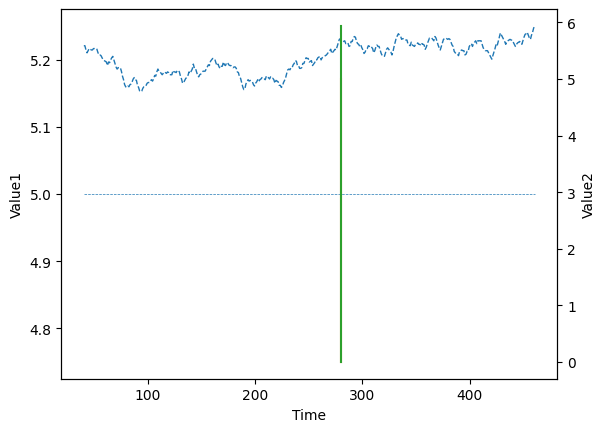

In [11]:
mavg = 80

moving_ave = ave_results.rolling(mavg).mean()

moving_ave2 = ave_results2.rolling(mavg).mean()

ax1 = sns.lineplot(x='Time',y='Value1',data=moving_ave,linestyle='--',linewidth=0.5)

# Create a secondary y-axis for 'Value2' column
ax2 = ax1.twinx()
sns.lineplot(x='Time',y='Value2',data=moving_ave2,linestyle='--',linewidth=1)

# Set labels and legends
ax1.set_ylabel('Value1')
ax2.set_ylabel('Value2')
plt.plot([280, 280], [0, max(moving_ave['Value1'][mavg-1:])])
plt.plot([280, 280], [0, max(moving_ave2['Value2'][mavg-1:])])
plt.show()

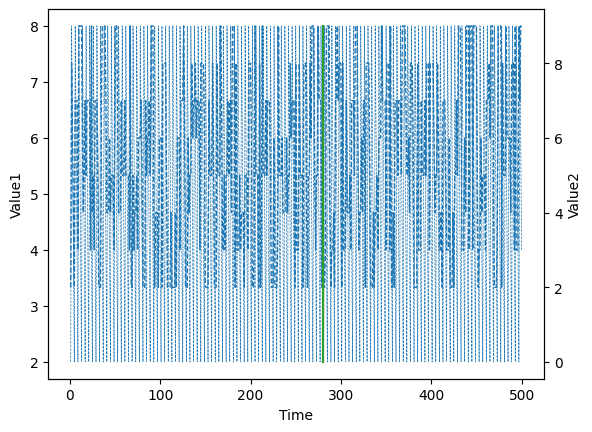

In [10]:
ax1 = sns.lineplot(x='Time',y='Value1',data=ave_results,linestyle='--',linewidth=0.5)

ax2 = ax1.twinx()
sns.lineplot(x='Time',y='Value2',data=ave_results2,linestyle='--',linewidth=1)

plt.plot([280, 280], [0, max(ave_results['Value1'])])
plt.plot([280, 280], [0, max(ave_results2['Value2'])])

ax1.set_ylabel('Value1')
ax2.set_ylabel('Value2')
plt.show()